In [49]:
!pip install matplotlib
!pip install matplotlib deap
import random
import numpy
from deap import base, creator, tools, algorithms
from matplotlib import pyplot


In [50]:
num_location = 9
location = []
for i in range(num_location):
  location.append((random.randint(0 , 100) ,random.randint(0 , 100)))
depot = (45,60)
num_vehicles = 3
#Printing The Locations
location


[(41, 18),
 (11, 91),
 (31, 45),
 (50, 65),
 (6, 86),
 (38, 33),
 (22, 3),
 (51, 57),
 (71, 95)]

In [51]:
creator.create("FitnessMin", base.Fitness , weights = (-1.0 , -1.0))#adding 2 minus one cause we have two factors to look total distance and std
creator.create("Individual", list , fitness = creator.FitnessMin )


In [52]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_location), num_location)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list , toolbox.individual)


In [53]:
# Fitness Function
def evalVRP(individual):

    total_distance = 0
    distances = []  # This will store the distance traveled by each vehicle

    for i in range(num_vehicles):
        vehicle_route = []
        vehicle_route.append(depot)

        for j in range(i, len(individual), num_vehicles):
            vehicle_route.append(location[individual[j]])
        vehicle_route.append(depot)
        vehicle_distance = 0

        for k in range(len(vehicle_route) - 1):
            current_location = np.array(vehicle_route[k])
            next_location = np.array(vehicle_route[k + 1])
            distance = np.linalg.norm(next_location - current_location)
            vehicle_distance += distance

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)


In [54]:
toolbox.register("mate", tools.cxOrdered )
toolbox.register("mutate", tools.mutShuffleIndexes ,indpb=0.05 )
toolbox.register("select", tools.selTournament, tournsize=10)


In [55]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in location:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [location[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()



gen	nevals	avg    	min    
0  	300   	268.845	3.60038
1  	224   	242.982	3.60038
2  	211   	224.672	4.79283
3  	218   	212.958	8.01091
4  	201   	206.907	8.01091
5  	217   	197.359	7.04282
6  	183   	182.856	7.04282
7  	228   	184.109	7.04282
8  	227   	184.276	8.34189
9  	227   	185.335	10.8028
10 	212   	184.011	7.04282
11 	219   	184.131	8.34189
12 	214   	184.234	7.04282
13 	218   	186.17 	7.04283
14 	222   	185.155	8.34189
15 	207   	185.978	7.18222
16 	224   	186.296	7.04282
17 	233   	186.333	7.04282
18 	218   	185.062	11.3873
19 	221   	182.63 	7.04282
20 	211   	183.783	7.04282
21 	224   	185.515	7.04282
22 	221   	185.252	3.80999
23 	209   	183.618	6.0041 
24 	217   	183.776	3.80999
25 	218   	183.551	7.04282
26 	217   	186.398	7.04282
27 	220   	185.6  	3.80999
28 	229   	185.89 	7.04282
29 	220   	184.666	6.0041 
30 	210   	183.562	6.0041 
31 	210   	183.931	7.04282
32 	195   	185.109	8.34189
33 	212   	184.764	3.80999
34 	212   	183.811	9.91006
35 	224   	184.464	3.80999
3

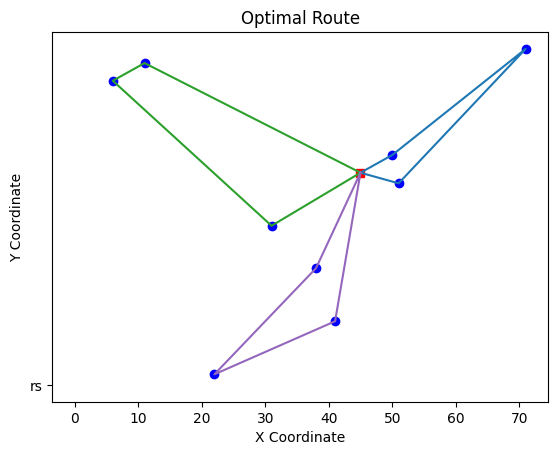

In [65]:
 def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.6, 0.3, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()